In [23]:
import nilearn
import nibabel as nib
from nilearn import plotting
from nilearn import datasets
from nilearn import image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [ ]:
from nibabel.testing import data_path

img = nib.load("/home/alden/Desktop/fmri_analysis_demo/fMRI_analysis/dataset/RhythmJudgment/sub_02/bold.nii.gz")
hdr = img.header

In [ ]:
data_shape = hdr.get_data_shape()
voxel_sizes = hdr.get_zooms()
spatial_units, temporal_units = hdr.get_xyzt_units()

print("Data shape:", data_shape)
print("Voxel sizes:", voxel_sizes)
print("Spatial units:", spatial_units)
print("Temporal units:", temporal_units)

In [24]:
from os.path import join
path_func = '/Users/zhenwei/Desktop/Franco-lab/MyConnectome/sub-01/ses-095/func/*object*bold*.gz'
path_anat = '/Users/zhenwei/Desktop/Franco-lab/MyConnectome/sub-01/ses-090/anat/*.gz'
path_event = '/Users/zhenwei/Desktop/Franco-lab/MyConnectome/sub-01/ses-095/func/*.tsv'
subject_data = {'func':sorted(glob.glob(path_func)),'anat':sorted(glob.glob(path_anat)),'events':sorted(glob.glob(path_event))}

In [25]:
subject_data['events']

['/Users/zhenwei/Desktop/Franco-lab/MyConnectome/sub-01/ses-095/func/sub-01_ses-095_task-objects_run-1_events.tsv',
 '/Users/zhenwei/Desktop/Franco-lab/MyConnectome/sub-01/ses-095/func/sub-01_ses-095_task-objects_run-2_events.tsv']

/Users/zhenwei/opt/anaconda3/envs/py11/lib/python3.11/site-packages/nilearn/image/resampling.py:591: UserWarning: Casting data from int32 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")


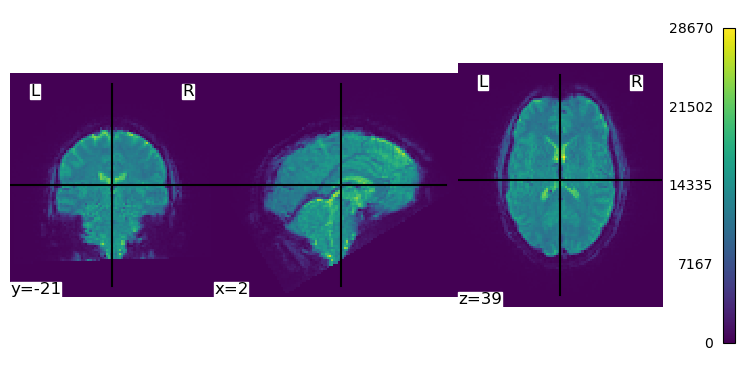

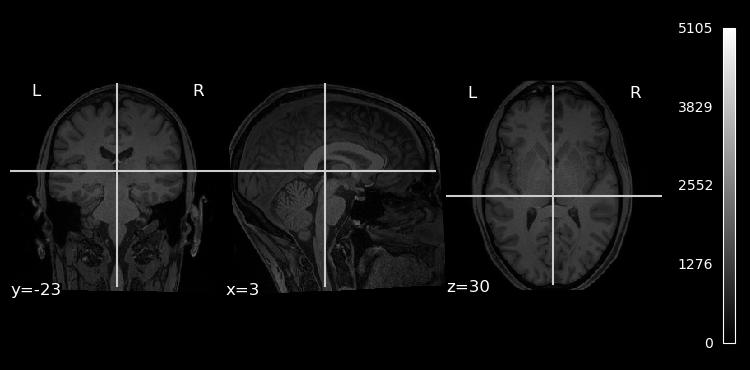

In [49]:
from nilearn.plotting import plot_anat, plot_img, plot_stat_map
from nilearn.image import mean_img, index_img

img = subject_data['func'][0]
anat_img = subject_data['anat'][0]
func_img = index_img(img, 0)
mean_img = mean_img(fmri_img)
events = pd.read_table(subject_data["events"][0])

plot_img(func_img, colorbar=True, cbar_tick_format="%i")
plot_anat(anat_img, colorbar=True, cbar_tick_format="%i")

In [27]:
events

,onset,duration,is_target,trial_type
0,0.0,0.5,0,blank
1,0.5,0.5,0,blank
2,1.0,0.5,0,blank
3,1.5,0.5,0,blank
4,2.0,0.5,0,blank
...,...,...,...,...
619,309.5,0.5,0,blank
620,310.0,0.5,0,blank
621,310.5,0.5,0,blank
622,311.0,0.5,0,blank


In [28]:
from nilearn.glm.first_level import FirstLevelModel

fmri_glm = FirstLevelModel(
    t_r=1.16,
    noise_model="ar1",
    standardize=False,
    hrf_model="spm",
    drift_model="cosine",
    high_pass=0.01,
)
fmri_glm = fmri_glm.fit(fmri_img, events)
design_matrix = fmri_glm.design_matrices_[0]

/Users/zhenwei/opt/anaconda3/envs/py11/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:166: UserWarning: The following unexpected columns in events data will be ignored: is_target
  warnings.warn(


In [29]:
design_matrix

,blank,body,car,face,guitar,house,limb,number,place,scrambled,word,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,constant
0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.086065,0.086060,0.086053,0.086043,0.086030,0.086014,1.0
1.16,0.001372,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.086053,0.086014,0.085948,0.085857,0.085739,0.085595,1.0
2.32,0.035837,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.086030,0.085921,0.085739,0.085484,0.085158,0.084759,1.0
3.48,0.164433,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.085995,0.085781,0.085425,0.084927,0.084288,0.083510,1.0
4.64,0.381301,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.085948,0.085595,0.085007,0.084186,0.083134,0.081854,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307.40,0.892734,0.0,-0.001284,-0.041238,-0.007398,0.0,0.0,0.0,-0.023962,-0.002246,0.183394,-0.085948,0.085595,-0.085007,0.084186,-0.083134,0.081854,1.0
308.56,1.020963,0.0,-0.000692,-0.058017,-0.004600,0.0,0.0,0.0,-0.016773,-0.007395,0.066514,-0.085995,0.085781,-0.085425,0.084927,-0.084288,0.083510,1.0
309.72,1.097056,0.0,-0.000321,-0.062671,-0.002778,0.0,0.0,0.0,-0.011278,-0.009946,-0.010062,-0.086030,0.085921,-0.085739,0.085484,-0.085158,0.084759,1.0
310.88,1.134200,0.0,-0.000112,-0.059260,-0.001633,0.0,0.0,0.0,-0.007314,-0.010663,-0.055218,-0.086053,0.086014,-0.085948,0.085857,-0.085739,0.085595,1.0


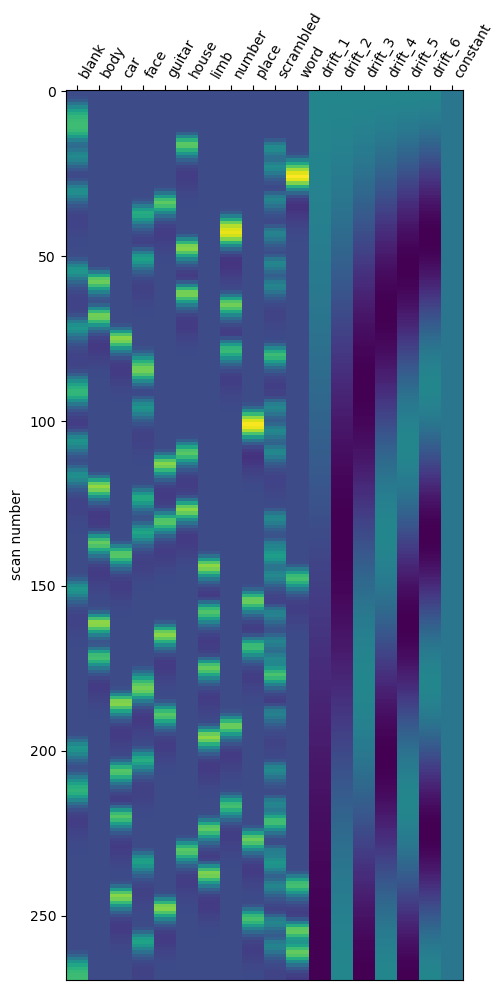

In [30]:
from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix)

plt.show()

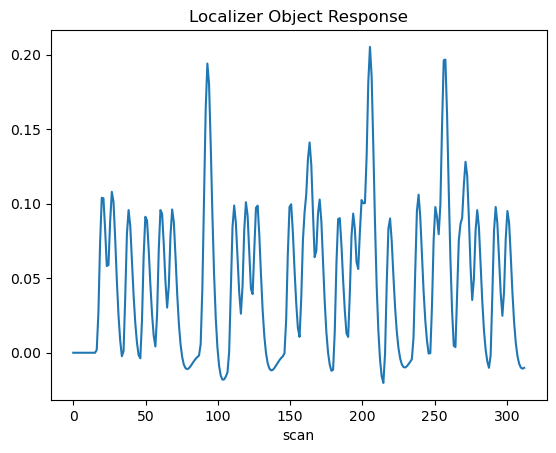

In [31]:
outdir = "results"
if not os.path.exists(outdir):
    os.mkdir(outdir)

plot_design_matrix(
    design_matrix, output_file=join(outdir, "design_matrix.png")
)

plt.plot(design_matrix["scrambled"])
plt.xlabel("scan")
plt.title("Localizer Object Response")
plt.show()

<Axes: label='conditions'>

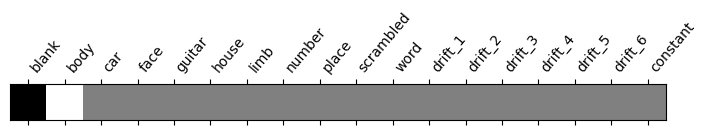

In [62]:
num_conditions = design_matrix.shape[1]
conditions = {"blank": np.zeros(num_conditions), "body": np.zeros(num_conditions),\
              "car": np.zeros(num_conditions), "face": np.zeros(num_conditions),\
              "guitar": np.zeros(num_conditions), "house": np.zeros(num_conditions),\
              "limb": np.zeros(num_conditions), "number": np.zeros(num_conditions),\
              "place": np.zeros(num_conditions),"scrambled": np.zeros(num_conditions),\
              "word": np.zeros(num_conditions)}
conditions["blank"][0] = 1
conditions["body"][1] = 1
conditions["car"][2] = 1
conditions["face"][3] = 1
conditions["guitar"][4] = 1
conditions["house"][5] = 1
conditions["limb"][6] = 1
conditions["number"][7] = 1
conditions["place"][8] = 1
conditions["scrambled"][9] = 1
conditions["word"][10] = 1


body_minus_blank = conditions["body"] - conditions["blank"]
car_minus_blank = conditions["car"] - conditions["blank"]
face_minus_blank = conditions["face"] - conditions["blank"]
guitar_minus_blank = conditions["guitar"] - conditions["blank"]
house_minus_blank = conditions["house"] - conditions["blank"]
limb_minus_blank = conditions["limb"] - conditions["blank"]
number_minus_blank = conditions["number"] - conditions["blank"]
place_minus_blank = conditions["place"] - conditions["blank"]
scrambled_minus_blank = conditions["scrambled"] - conditions["blank"]
word_minus_blank = conditions["word"] - conditions["blank"]

from nilearn.plotting import plot_contrast_matrix

plot_contrast_matrix(body_minus_blank, design_matrix=design_matrix)

In [63]:
eff_map = fmri_glm.compute_contrast(
    body_minus_blank, output_type="effect_size"
)
z_map = fmri_glm.compute_contrast(face_minus_blank, output_type="z_score")

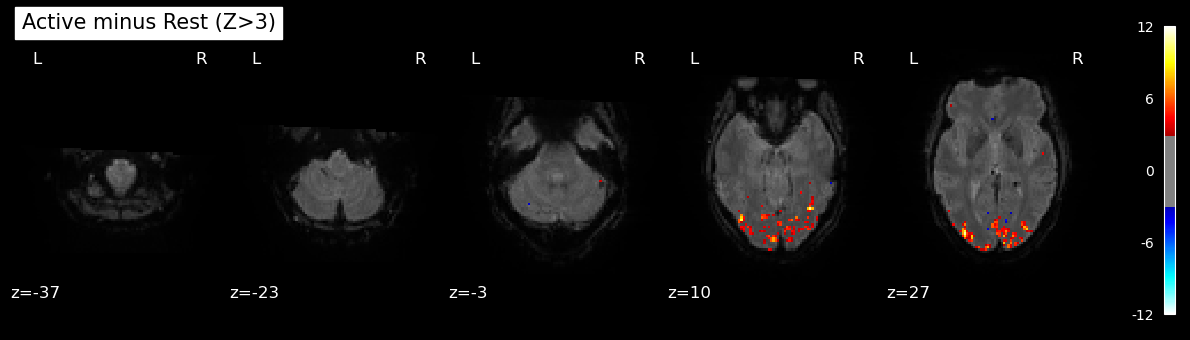

In [64]:
plot_stat_map(
    z_map,
    bg_img=mean_img,
    threshold=3.0,
    display_mode="z",
    cut_coords=5,
    black_bg=True,
    title="Active minus Rest (Z>3)",
)
plt.show()

Uncorrected p<0.001 threshold: 3.291


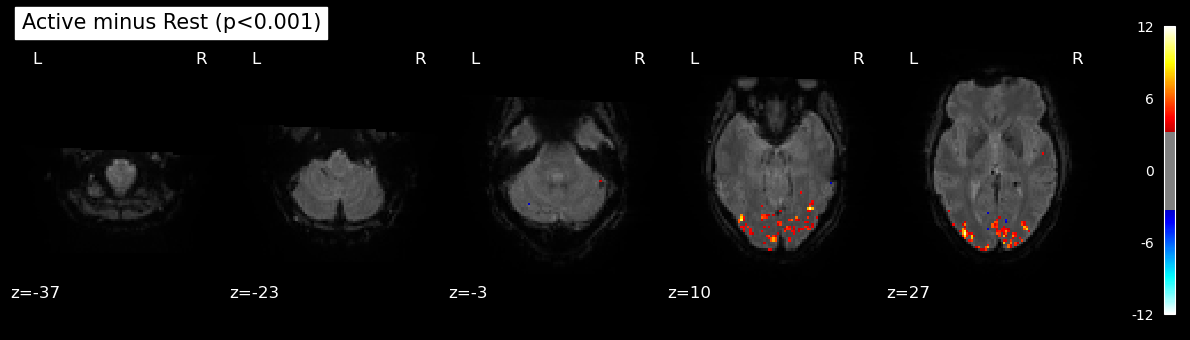

In [65]:
from nilearn.glm import threshold_stats_img

_, threshold = threshold_stats_img(z_map, alpha=0.001, height_control="fpr")
print(f"Uncorrected p<0.001 threshold: {threshold:.3f}")
plot_stat_map(
    z_map,
    bg_img=mean_img,
    threshold=threshold,
    display_mode="z",
    cut_coords=5,
    black_bg=True,
    title="Active minus Rest (p<0.001)",
)
plt.show()

Bonferroni-corrected, p<0.05 threshold: 5.051


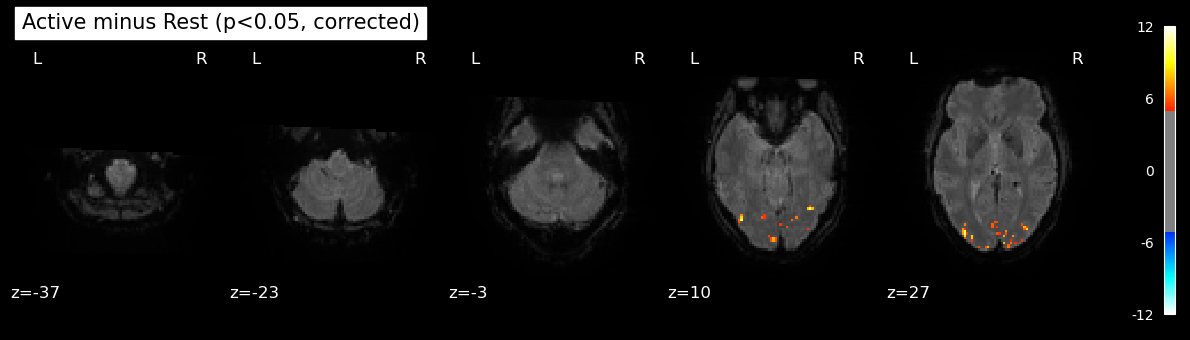

In [66]:
_, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="bonferroni"
)
print(f"Bonferroni-corrected, p<0.05 threshold: {threshold:.3f}")
plot_stat_map(
    z_map,
    bg_img=mean_img,
    threshold=threshold,
    display_mode="z",
    cut_coords=5,
    black_bg=True,
    title="Active minus Rest (p<0.05, corrected)",
)
plt.show()

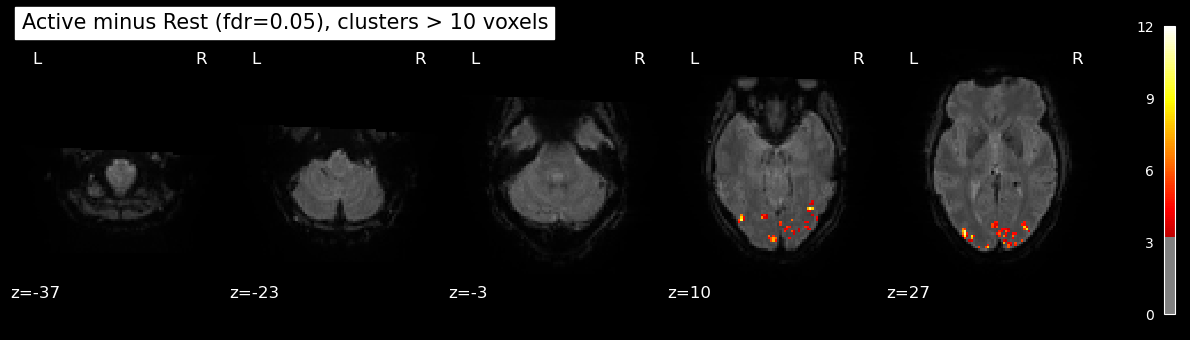

In [67]:
clean_map, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="fdr", cluster_threshold= 10
)
plot_stat_map(
    clean_map,
    bg_img=mean_img,
    threshold=threshold,
    display_mode="z",
    cut_coords=5,
    black_bg=True,
    title="Active minus Rest (fdr=0.05), clusters > 10 voxels",
)
plt.show()

In [68]:
from nilearn.reporting import get_clusters_table

table = get_clusters_table(
    z_map, stat_threshold=threshold, cluster_threshold=10
)
table

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,2.488980,-87.164621,14.648260,12.003701,9119
1,1a,29.275090,-74.592105,3.504732,11.692621,
2,1b,9.989343,-76.858519,7.154995,11.370795,
3,1c,4.695518,-91.001725,20.811687,11.005069,
4,2,-31.417536,-92.266403,27.394369,11.723862,1226
5,2a,-19.508310,-103.872414,23.365513,7.668328,
6,2b,-24.233101,-94.401347,26.287082,7.351958,
7,2c,-17.114501,-107.974040,20.886312,7.312368,
8,3,-35.641537,-78.754756,10.223077,10.608139,757
9,3a,-35.892835,-83.826025,18.370412,6.142381,


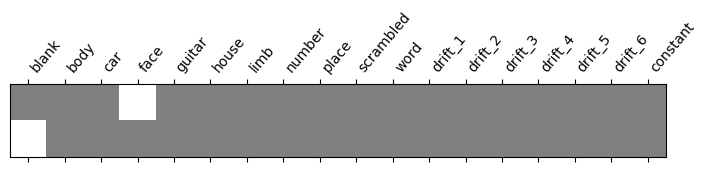

In [73]:
# Performing F test
effects_of_interest = np.vstack((conditions["face"], conditions["blank"]))
plot_contrast_matrix(effects_of_interest, design_matrix)
plt.show()

z_map = fmri_glm.compute_contrast(effects_of_interest, output_type="z_score")

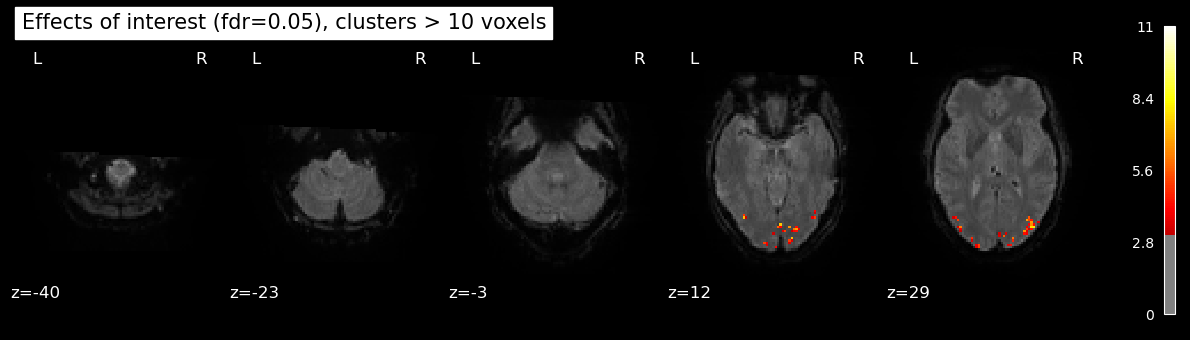

In [72]:
clean_map, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="fdr", cluster_threshold=5
)
plot_stat_map(
    clean_map,
    bg_img=mean_img,
    threshold=threshold,
    display_mode="z",
    cut_coords=5,
    black_bg=True,
    title="Effects of interest (fdr=0.05), clusters > 10 voxels",
)
plt.show()